In [10]:
# 📦 1. Importar librerías necesarias
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np




In [11]:
# 📁 2. Definir rutas a las carpetas
train_dir = 'fer2013_dataset/train'
test_dir = 'fer2013_dataset/test'


In [12]:
# 🔄 3. Preparar generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
# 🔄 3. Preparar generadores de datos (solo happy y sad)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    classes=['happy', 'sad']  # 👈 solo estas clases
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    classes=['happy', 'sad']  # 👈 solo estas clases
)


Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


In [16]:
# 🧠 4. Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 clases: happy, sad
])



In [17]:
# ⚙️ 5. Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 🚀 6. Entrenar el modelo
model.fit(train_data, epochs=10, validation_data=test_data)



Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 121s 319ms/step - accuracy: 0.6113 - loss: 0.6618 - val_accuracy: 0.7392 - val_loss: 0.5256
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7397 - loss: 0.5159 - val_accuracy: 0.7253 - val_loss: 0.5070
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7744 - loss: 0.4549 - val_accuracy: 0.7875 - val_loss: 0.4327
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8019 - loss: 0.4078 - val_accuracy: 0.8077 - val_loss: 0.4215
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8173 - loss: 0.3821 - val_accuracy: 0.8140 - val_loss: 0.4051
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8308 - loss: 0.3534 - val_accuracy: 0.8143 - val_loss: 0.3973
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8575 - loss: 0.3110 - val_accuracy: 0.8163 - val_loss: 0.4066
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8657 - loss: 0.2995 - val_a

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4411
Test Accuracy: 81.79%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


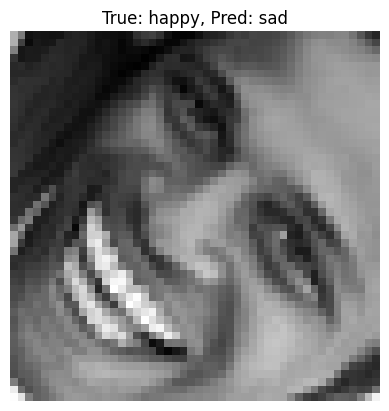

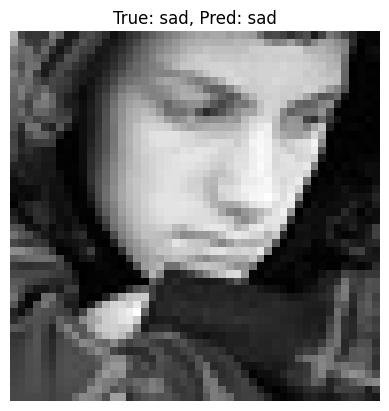

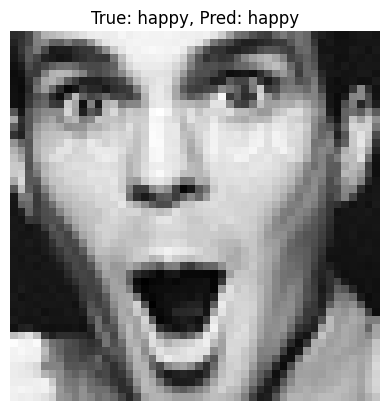

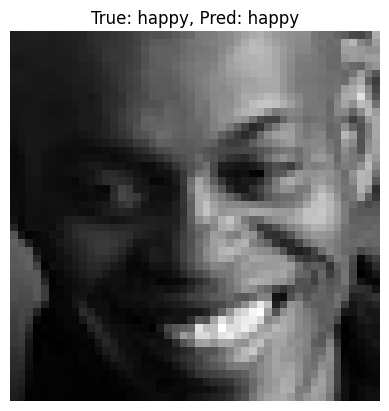

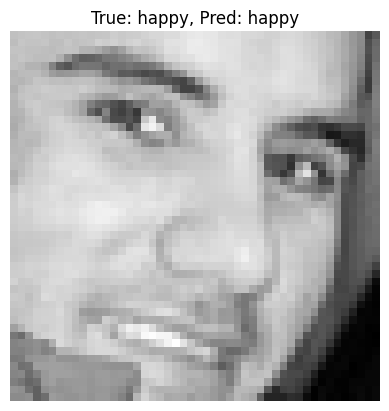

In [18]:
# 📊 7. Evaluar el modelo
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 🖼️ 8. Mostrar algunas predicciones
class_names = list(train_data.class_indices.keys())

def show_predictions(data, model, num_images=5):
    images, labels = next(data)
    predictions = model.predict(images)
    for i in range(num_images):
        plt.imshow(images[i].reshape(48, 48), cmap='gray')
        true_label = class_names[np.argmax(labels[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis('off')
        plt.show()

show_predictions(test_data, model)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'fer2013_dataset/train'
test_dir = 'fer2013_dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    classes=['happy', 'sad']
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    classes=['happy', 'sad']
)


Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

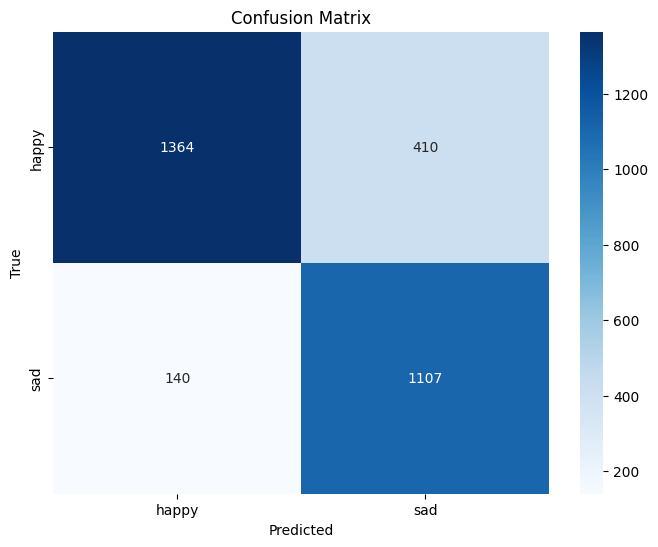

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = list(train_data.class_indices.keys())

def plot_confusion_matrix(data, model):
    y_true = []
    y_pred = []
    
    for images, labels in data:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))
        if len(y_true) >= data.samples:
            break
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(test_data, model)
